In [5]:
import numpy as np
import pandas as pd
import Mongo_Connector as mongo
import tlsh
from icecream import ic
import matplotlib.pyplot as plt
import ssdeep
import warnings
from itertools import combinations
warnings.filterwarnings('ignore')
db = mongo.init("portainer", port=32768)
df = pd.DataFrame(list(db["families"].find({})))

<Axes: >

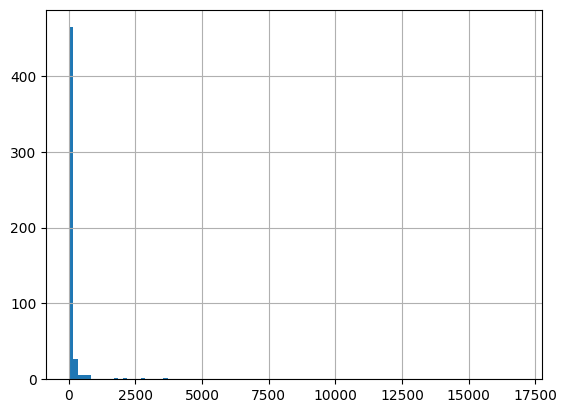

In [6]:
family_counts = df['family'].value_counts()

# Filter the families with more than one entry
malware_filtered = df[df['family'].map(family_counts) > 1]

family_counts.hist(bins=100)

In [7]:
df.head()

,_id,family,SHA256,file_size,ssdeep,sdhash,tlsh,machoc
0,6563776f3624482ac9d197e3,9002Rat,006c74c6813a6efeabea860b2718ed548eed216a319d76...,66888,{'ssdeep': '1536:fyOinfXrmThthYvYh+8+IXbTyllRb...,sdhash hash,{'tlsh': 'T18A635B27E9548473CDC24DB044E80B7B8A...,Machoc hash
1,6563776f3624482ac9d197e4,9002Rat,0414ffdf9dcf32061cc57d0b54bf4410c1c588258c1261...,91136,{'ssdeep': '1536:isQQjCC6ZRC5EPviVkdsayrPJe7P6...,sdhash hash,{'tlsh': 'T1D9937B107682C275D47A29344C69CB731B...,Machoc hash
2,6563776f3624482ac9d197e5,9002Rat,054ac444bb2e4fa836ecb6ecdbb9381001ab26cf109451...,20008392,{'ssdeep': '393216:1ZZNprQxrpbXZRCb0g/6cGx3PjW...,sdhash hash,{'tlsh': 'T14217331276D2C037C1A711719A37EB29AA...,Machoc hash
3,6563776f3624482ac9d197e6,9002Rat,06fb64ebe50ee96901a339a7c5f686ead86e2ed6b26a73...,13189815,{'ssdeep': '393216:z0ZCif89tnKfsp09SskycXZBBLW...,sdhash hash,{'tlsh': 'T192D6336519E01E8CF2D177765AB1A2D44F...,Machoc hash
4,6563776f3624482ac9d197e7,9002Rat,07da10375b0862760f3cb84e563f74ff4fc53864e34836...,21415252,{'ssdeep': '393216:c5gt4ljF2jF0C0eUkGz2Wqha9zO...,sdhash hash,{'tlsh': 'T16827339FB8735437E78CE4F089FA77F202...,Machoc hash


In [8]:
original_count = df.shape[0]

# Count the occurrences of each family
family_counts = df['family'].value_counts()

# Filter the DataFrame to keep families with more than one entry
malware_filtered = df[df['family'].map(family_counts) > 1]

# Get the new number of rows after filtering
filtered_count = malware_filtered.shape[0]

# Identify the families that were removed
removed_families = family_counts[family_counts == 1].index.tolist()

# Print the results
print(f"Original DataFrame had {original_count} rows.")
print(f"Filtered DataFrame has {filtered_count} rows.")
print(f"Families removed (only had 1 entry): {removed_families}")

Original DataFrame had 104370 rows.
Filtered DataFrame has 104260 rows.
Families removed (only had 1 entry): ['Cryxos', 'CABless-40444', 'Amadey', 'Gopuram', 'GoSearch', 'WhiteBlackCrypt', 'OriginLogger', 'Android.Sharkbot', 'CaddyWiper', 'Coper', 'WagnerWiper', 'GwisinLocker', 'GoodwillRansomware', 'DeadBoltRansomware', 'CuratorRansomware', 'HaronRansomware', 'VMProtect', 'Cova', 'ViperSoftX', 'AzovRansomware', 'RhadamanthysLoader', 'Hydra', 'DarkWatchmanRAT', 'VBCrypt', 'NvRendererMiner', 'CerberRansomware', 'GodFather', 'Nukesped', 'RedCap', 'DTrack', 'Pymafka', 'EchelonStealer', 'DiscordRAT', 'Enigma', 'Escobar', 'AcidRain', 'EvilQuest', 'Zanubis', 'PoweRAT', 'Exmatter', 'ClipBanker', 'PlatinumGroup', 'FastViewer', 'Conficker', 'FBIOperationDuckHunt', 'Ousaban', 'AppleSeed', 'Flashback', 'Oski', 'XFilesStealer', 'Oscorp', 'CertiShell', 'Gh0stRAT', 'GigabudRAT', 'Industroyer', 'IssacWiper', 'IRATA', 'MeowRansomware', 'Babadeda', 'NeutrinoEK', 'Strab', 'MacOS.Coldroot', 'Stealc', 'Ma

In [9]:
malware_filtered

,_id,family,SHA256,file_size,ssdeep,sdhash,tlsh,machoc
0,6563776f3624482ac9d197e3,9002Rat,006c74c6813a6efeabea860b2718ed548eed216a319d76...,66888,{'ssdeep': '1536:fyOinfXrmThthYvYh+8+IXbTyllRb...,sdhash hash,{'tlsh': 'T18A635B27E9548473CDC24DB044E80B7B8A...,Machoc hash
1,6563776f3624482ac9d197e4,9002Rat,0414ffdf9dcf32061cc57d0b54bf4410c1c588258c1261...,91136,{'ssdeep': '1536:isQQjCC6ZRC5EPviVkdsayrPJe7P6...,sdhash hash,{'tlsh': 'T1D9937B107682C275D47A29344C69CB731B...,Machoc hash
2,6563776f3624482ac9d197e5,9002Rat,054ac444bb2e4fa836ecb6ecdbb9381001ab26cf109451...,20008392,{'ssdeep': '393216:1ZZNprQxrpbXZRCb0g/6cGx3PjW...,sdhash hash,{'tlsh': 'T14217331276D2C037C1A711719A37EB29AA...,Machoc hash
3,6563776f3624482ac9d197e6,9002Rat,06fb64ebe50ee96901a339a7c5f686ead86e2ed6b26a73...,13189815,{'ssdeep': '393216:z0ZCif89tnKfsp09SskycXZBBLW...,sdhash hash,{'tlsh': 'T192D6336519E01E8CF2D177765AB1A2D44F...,Machoc hash
4,6563776f3624482ac9d197e7,9002Rat,07da10375b0862760f3cb84e563f74ff4fc53864e34836...,21415252,{'ssdeep': '393216:c5gt4ljF2jF0C0eUkGz2Wqha9zO...,sdhash hash,{'tlsh': 'T16827339FB8735437E78CE4F089FA77F202...,Machoc hash
...,...,...,...,...,...,...,...,...
104365,6563a2f13624482ac9d32f90,zxShell,e2d2761fc2535d99527df2f7cffd8dddccd504dc0096f6...,1181088,{'ssdeep': '24576:OD46fWg3rOqkdvJ7jXLq7+aywR+r...,sdhash hash,{'tlsh': 'T1C64523683D62D4F0C4EF523C29FA7B2C76...,Machoc hash
104366,6563a2f13624482ac9d32f91,zxShell,e416ad91acbc386bf67dc551fb36b9d95a195d8b656cfe...,581536,{'ssdeep': '12288:1wHoMbN76R+m/ZZsJsjLa7pxIkmV...,sdhash hash,{'tlsh': 'T178C423AB070915FBE54ADC3C005752E41C...,Machoc hash
104367,6563a2f13624482ac9d32f92,zxShell,ef049339f1eb091cda335b51939f91e784e1ab1e006056...,1678576,{'ssdeep': '24576:nUtLEVCXBJFlUXYuJmQsYsECO0Gw...,sdhash hash,{'tlsh': 'T1807533E66396CC60DFAAC4B2AF8F4266DB...,Machoc hash
104368,6563a2f13624482ac9d32f93,zxShell,fbe294910ef833e1c9b2c8663c06b6ef99c13b2bc5eb01...,1698208,{'ssdeep': '24576:hlIE5fsyVqdxskKfia9TQyaM9rrI...,sdhash hash,{'tlsh': 'T1067533C5AA1F6183EFCB443A57759E3AF7...,Machoc hash


In [10]:
malware_filtered["scicore"] = False
size = malware_filtered.shape[0] / 10
scicore = pd.DataFrame(list(db["scicore"].aggregate([{"$sample": {"size": size}}])))
scicore["scicore"] = True

malware_concat = pd.concat([malware_filtered, scicore])

malware_concat

,_id,family,SHA256,file_size,ssdeep,sdhash,tlsh,machoc,scicore
0,6563776f3624482ac9d197e3,9002Rat,006c74c6813a6efeabea860b2718ed548eed216a319d76...,66888,{'ssdeep': '1536:fyOinfXrmThthYvYh+8+IXbTyllRb...,sdhash hash,{'tlsh': 'T18A635B27E9548473CDC24DB044E80B7B8A...,Machoc hash,False
1,6563776f3624482ac9d197e4,9002Rat,0414ffdf9dcf32061cc57d0b54bf4410c1c588258c1261...,91136,{'ssdeep': '1536:isQQjCC6ZRC5EPviVkdsayrPJe7P6...,sdhash hash,{'tlsh': 'T1D9937B107682C275D47A29344C69CB731B...,Machoc hash,False
2,6563776f3624482ac9d197e5,9002Rat,054ac444bb2e4fa836ecb6ecdbb9381001ab26cf109451...,20008392,{'ssdeep': '393216:1ZZNprQxrpbXZRCb0g/6cGx3PjW...,sdhash hash,{'tlsh': 'T14217331276D2C037C1A711719A37EB29AA...,Machoc hash,False
3,6563776f3624482ac9d197e6,9002Rat,06fb64ebe50ee96901a339a7c5f686ead86e2ed6b26a73...,13189815,{'ssdeep': '393216:z0ZCif89tnKfsp09SskycXZBBLW...,sdhash hash,{'tlsh': 'T192D6336519E01E8CF2D177765AB1A2D44F...,Machoc hash,False
4,6563776f3624482ac9d197e7,9002Rat,07da10375b0862760f3cb84e563f74ff4fc53864e34836...,21415252,{'ssdeep': '393216:c5gt4ljF2jF0C0eUkGz2Wqha9zO...,sdhash hash,{'tlsh': 'T16827339FB8735437E78CE4F089FA77F202...,Machoc hash,False
...,...,...,...,...,...,...,...,...,...
1985,319,MEME,175a768e13cf6359e4e27b54649d50ba86505c3e22e8c2...,1404,{'ssdeep': '24:+Vatk87JJQKdWELby1uNlHW4NgHW9Be...,sdhash hash,{'tlsh': 'T1D321F12CA06B49E394A3D1756D80B1956F...,Machoc hash,True
1986,685,Perl,0510a3b8d10b08ff3febc250ace0a9334c352948210c6a...,1970744,{'ssdeep': '24576:XCLzhkIfEI62XkWqF0UKFX8b7sBS...,sdhash hash,{'tlsh': 'T1C2956C07E6A214EAC4D6D0344B5F92A37E...,Machoc hash,True
1987,532,p7zip,7b6a799fc852da3d9f848eda6427fe9df8903928c91a7c...,782712,{'ssdeep': '12288:VWfe3AzkGmBb0RlQOacDlY5z8K1H...,sdhash hash,{'tlsh': 'T1CEF46C43F7A6947EC0D1D632822E9222F5...,Machoc hash,True
1988,1040,gperf,93d4b25aeeb6401bca29df6271e1c54aaeb2658d671473...,107872,{'ssdeep': '3072:PbDh1RhWJbNmT8IWy/jttl6l/XaON...,sdhash hash,{'tlsh': 'T159B35C037AD15879C482C5354A6B8291A9...,Machoc hash,True


In [11]:
a = malware_concat
a['tlsh'] = a['tlsh'].apply(lambda x: x['tlsh'] if 'tlsh' in x and isinstance(x, dict) else x)
a

,_id,family,SHA256,file_size,ssdeep,sdhash,tlsh,machoc,scicore
0,6563776f3624482ac9d197e3,9002Rat,006c74c6813a6efeabea860b2718ed548eed216a319d76...,66888,{'ssdeep': '1536:fyOinfXrmThthYvYh+8+IXbTyllRb...,sdhash hash,T18A635B27E9548473CDC24DB044E80B7B8A77B6B00765...,Machoc hash,False
1,6563776f3624482ac9d197e4,9002Rat,0414ffdf9dcf32061cc57d0b54bf4410c1c588258c1261...,91136,{'ssdeep': '1536:isQQjCC6ZRC5EPviVkdsayrPJe7P6...,sdhash hash,T1D9937B107682C275D47A29344C69CB731BBE7E529AF4...,Machoc hash,False
2,6563776f3624482ac9d197e5,9002Rat,054ac444bb2e4fa836ecb6ecdbb9381001ab26cf109451...,20008392,{'ssdeep': '393216:1ZZNprQxrpbXZRCb0g/6cGx3PjW...,sdhash hash,T14217331276D2C037C1A711719A37EB29AAF2B0305734...,Machoc hash,False
3,6563776f3624482ac9d197e6,9002Rat,06fb64ebe50ee96901a339a7c5f686ead86e2ed6b26a73...,13189815,{'ssdeep': '393216:z0ZCif89tnKfsp09SskycXZBBLW...,sdhash hash,T192D6336519E01E8CF2D177765AB1A2D44F79FF168B43...,Machoc hash,False
4,6563776f3624482ac9d197e7,9002Rat,07da10375b0862760f3cb84e563f74ff4fc53864e34836...,21415252,{'ssdeep': '393216:c5gt4ljF2jF0C0eUkGz2Wqha9zO...,sdhash hash,T16827339FB8735437E78CE4F089FA77F202ED9DB5B854...,Machoc hash,False
...,...,...,...,...,...,...,...,...,...
1985,319,MEME,175a768e13cf6359e4e27b54649d50ba86505c3e22e8c2...,1404,{'ssdeep': '24:+Vatk87JJQKdWELby1uNlHW4NgHW9Be...,sdhash hash,T1D321F12CA06B49E394A3D1756D80B1956F43AD378B62...,Machoc hash,True
1986,685,Perl,0510a3b8d10b08ff3febc250ace0a9334c352948210c6a...,1970744,{'ssdeep': '24576:XCLzhkIfEI62XkWqF0UKFX8b7sBS...,sdhash hash,T1C2956C07E6A214EAC4D6D0344B5F92A37E39F5665221...,Machoc hash,True
1987,532,p7zip,7b6a799fc852da3d9f848eda6427fe9df8903928c91a7c...,782712,{'ssdeep': '12288:VWfe3AzkGmBb0RlQOacDlY5z8K1H...,sdhash hash,T1CEF46C43F7A6947EC0D1D632822E9222F5B07C89453A...,Machoc hash,True
1988,1040,gperf,93d4b25aeeb6401bca29df6271e1c54aaeb2658d671473...,107872,{'ssdeep': '3072:PbDh1RhWJbNmT8IWy/jttl6l/XaON...,sdhash hash,T159B35C037AD15879C482C5354A6B8291A933F8B6A331...,Machoc hash,True


In [9]:
def tlsh_comb(df=malware_concat):
    from itertools import combinations
    
    # Generate all binary combinations of the strings in the specified column
    string_combinations = combinations(df[['tlsh', 'family', 'scicore']].iterrows(), 2)
    print("String combinations generated")
    # Apply tlsh.diff to each combination
    results = []
    for (idx1, row1), (idx2, row2) in string_combinations:
        if row1['tlsh']["tlsh"] != "TNULL" and row2['tlsh']["tlsh"] != "TNULL":
            diff_score = tlsh.diff(row1['tlsh']["tlsh"], row2['tlsh']["tlsh"])
            results.append((row1['family'], row2['family'], row1['scicore'], row2['scicore'], row1['tlsh']['tlsh'], row2['tlsh']['tlsh'], diff_score))
    
    # Convert results to DataFrame
    results_df = pd.DataFrame(results, columns=['Family 1', 'Family 2', 'Scicore 1', "Scicore 2", 'TLSH 1', 'TLSH 2', 'Diff Score'])
    
    return results_df
results_df = tlsh_comb(a)

String combinations generated


TypeError: string indices must be integers

In [30]:

filtered_df = a[a['tlsh'] != 'TNULL']



In [29]:
b = a[['family', 'scicore', 'tlsh']]
len(b[b['tlsh'] == 'TNULL'])

19

In [14]:
import pandas as pd

import tlsh

def tlsh_comb(df):

    # Generate combinations
    string_combinations = combinations(df[['family', 'scicore', 'tlsh']],2)

    # Use list comprehension for results
    results = [
        (row1['family'], row2['family'], row1['scicore'], row2['scicore'], row1['tlsh'], row2['tlsh'], tlsh.diff(row1['tlsh'], row2['tlsh']))
        for (idx1, row1), (idx2, row2) in string_combinations
    ]

    # Convert results to DataFrame
    results_df = pd.DataFrame(results, columns=['Family 1', 'Family 2', 'Scicore 1', 'Scicore 2', 'TLSH 1', 'TLSH 2', 'Diff Score'])

    return results_df

# Usage
results_df = tlsh_comb(a)


ValueError: too many values to unpack (expected 2)

In [31]:
import pandas as pd
from itertools import combinations
import tlsh

def tlsh_comb(df):
    # Generate combinations
    string_combinations = combinations(df[['family', 'scicore', 'tlsh']].itertuples(index=False), 2)

    # Use list comprehension for results
    results = []
    for row1, row2 in string_combinations:
        try:
            diff_score = tlsh.diff(row1.tlsh, row2.tlsh)
            results.append((row1.family, row2.family, row1.scicore, row2.scicore, row1.tlsh, row2.tlsh, diff_score))
            
        except Exception as e:
            # Handle exceptions (e.g., invalid TLSH values)
            print(f"Error processing row: {e}")
            break

    # Convert results to DataFrame
    results_df = pd.DataFrame(results, columns=['Family 1', 'Family 2', 'Scicore 1', 'Scicore 2', 'TLSH 1', 'TLSH 2', 'Diff Score'])

    return results_df

# Usage
results_df = tlsh_comb(filtered_df)  # Replace 'your_dataframe' with your actual DataFrame variable


KeyboardInterrupt: 

In [ ]:

p = results_df.loc[results_df.groupby("TLSH 1")["Diff Score"].idxmin()]

p = p[p["Scicore 2"] != True]

(p["Family 1"] == p["Family 2"]).sum() / p.shape[0]